In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import torch
import cv2

In [13]:
def plot_3d_image(image: torch.tensor):
    image = image.detach().cpu()
    image_size = image.shape
    X, Y, Z = [], [], []
    for x in range(image_size[0]):
        for y in range(image_size[1]):
            if image[x, y] < 0:
                continue
            X.append(x)
            Y.append(y)
            Z.append(image[x, y])

    print(len(Z))  # 查看Z的数量
    # 开始制图
    fig = plt.figure()
    ax = fig.add_subplot(projection="3d")  # ax = Axes3D(fig)
    ax.set_xlabel('x', fontsize=10, color='black')  # 设置x标签及其参数
    ax.set_ylabel('y', fontsize=10, color='black')  # 设置y标签及其参数
    ax.set_zlabel('value', fontsize=10, color='black')   # 设置z标签及其参数
    ax.plot_trisurf(X, Y, Z, cmap=plt.get_cmap('viridis'), linewidth=0.1)  # 三角表面图
    ax.view_init(elev=80, azim=45)  # 俯仰角10°，方位角20°
    plt.imshow()

27648


TypeError: imshow() missing 1 required positional argument: 'X'

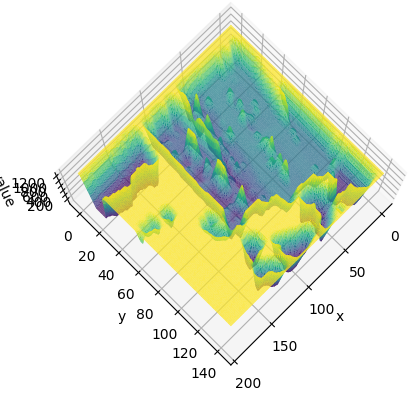

In [15]:
file = r"E:\Developments\Vitual studio\RebarDetection\Resource\img_with_depth\2024_05_05_10_38_11\DepthNpy\1.npy"

device='cuda'

data = np.load(file)
data_size = [int(data.shape[-2] * 0.3), int(data.shape[-1] * 0.3)]
data = cv2.resize(data, dsize=data_size)
avg = data.mean()
std = data.std()
# 大于 avg + 2 * std 或者小于 avg - 2 * std 的值设置为 -1
data[data > avg + std] = -1
data[data < avg - 0.5 * std] = -1
data = avg + std - data
data = cv2.medianBlur(data, 3)
data = cv2.blur(data, (5, 5))
data = torch.from_numpy(data).to(device)

plot_3d_image(image=data)